## Find a dataset you'd like to explore. This can be something you're familiar with or something new. Create a Jupyter notebook and then:


### 1. Choose one variable and plot that variable four different ways.<br>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('datasets/london_merged.csv')
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


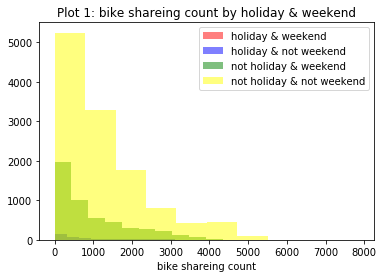

In [34]:
# Creating variables for each of the four conditions to graph using the basic
# matplotlib functionality.
holiday_weekend = df.loc[(df['is_holiday']==1.0)&(df['is_weekend']==1.0),'cnt']
holiday_noweekend = df.loc[(df['is_holiday']== 1.0)&(df['is_weekend']==0.0),'cnt']
noholiday_weekend = df.loc[(df['is_holiday']==0.0)&(df['is_weekend']==1.0),'cnt']
noholiday_nonoweekend = df.loc[(df['is_holiday']==0.0)&(df['is_weekend']==0.0),'cnt']

# Making overlapping histograms.
plt.hist(holiday_weekend, color='red',  alpha=.5,label='holiday & weekend')  # alpha just controls the opacity
plt.hist(holiday_noweekend, color='blue', alpha=.5,label='holiday & not weekend')
plt.hist(noholiday_weekend, color='green', alpha=.5,label='not holiday & weekend')  
plt.hist(noholiday_nonoweekend, color='yellow', alpha=.5,label='not holiday & not weekend')
plt.xlabel('bike shareing count')
plt.legend(loc='upper right')
plt.title('Plot 1: bike shareing count by holiday & weekend')
plt.show()

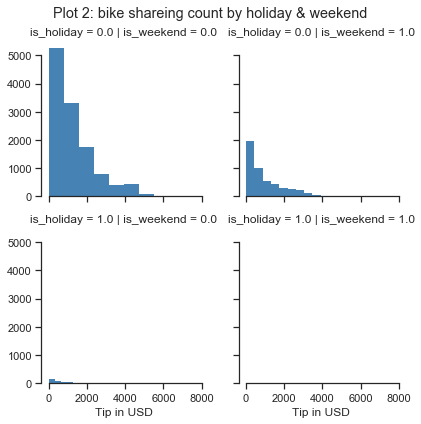

In [41]:
# Showing the  information in a seaborn facet grid.
sns.set(style="ticks")  #Setting the overall aesthetic

# Tell seaborn about the structure of our data.
g = sns.FacetGrid(df, row="is_holiday", col="is_weekend")
# Name the plot type and the variable to be plotted using the structure.
g.map(plt.hist, "cnt", color="steelblue",  lw=0)
# Moving the plots apart to make room for our titles.
plt.subplots_adjust(top=0.9)
# Making a more informative axis name.
g.set_axis_labels('Tip in USD')
plt.suptitle('Plot 2: bike shareing count by holiday & weekend')
# Removing excess lines around the plot.
sns.despine(trim=True)
plt.show()

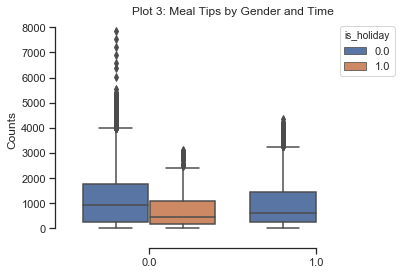

In [42]:
# Comparing groups using boxplots.
ax = sns.boxplot(x='is_weekend',y='cnt',hue='is_holiday',data=df)  
plt.title('Plot 3: bike shareing count by holiday & weekend')
sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='Counts')

plt.show()

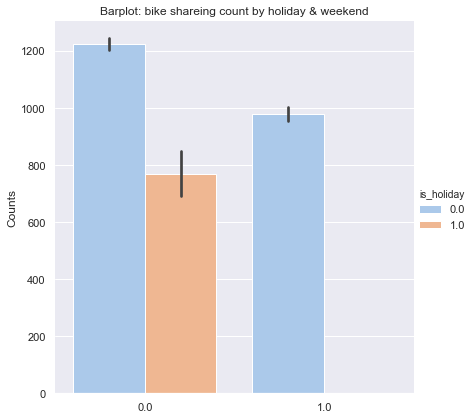

In [43]:
# Setting the overall aesthetic.
sns.set(style="darkgrid")

# Use catplot (previous versions of seaborn use factorplot)
g = sns.catplot(x="is_weekend", y="cnt", hue="is_holiday", data=df,
                   height=6, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("Counts")
g.set_xlabels("")
plt.title('Barplot: bike shareing count by holiday & weekend')
plt.show()

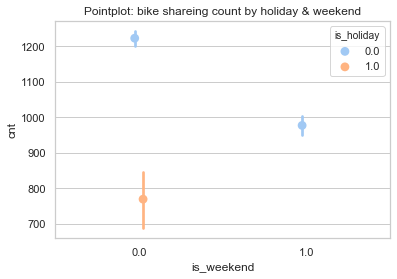

In [44]:
# Setting the overall aesthetic.
sns.set(style="whitegrid")

g = sns.pointplot(x="is_weekend", y="cnt", hue="is_holiday", data=df,
                   height=6, kind="strip", palette="pastel",ci=95,dodge=True,join=False)
plt.title('Pointplot: bike shareing count by holiday & weekend')
plt.show()


### 2. Choose two continuous variables, and plot them three different ways.

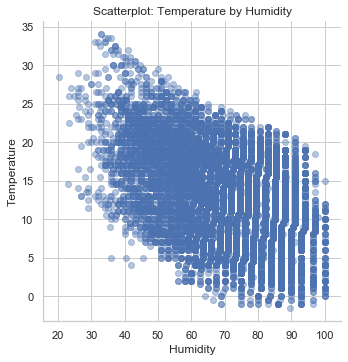

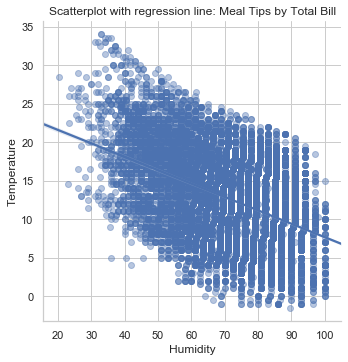

In [47]:
g = sns.lmplot(y='t1', # Variable 1.
               x='hum', # Variable 2.
               data=df, # Data
               fit_reg=False, # If set to true, plots a regression line.
               scatter_kws={'alpha':0.4}) # Set points to semi-transparent to see overlapping points.
g.set_ylabels("Temperature")
g.set_xlabels("Humidity")
plt.title('Scatterplot: Temperature by Humidity')
plt.show()

g = sns.lmplot(y='t1', # Variable 1.
               x='hum', # Variable 2.
               data=df, # Data.
               fit_reg=True, # The regression line also includes a 95% confidence envelope.
               scatter_kws={'alpha':0.4})
g.set_ylabels("Temperature")
g.set_xlabels("Humidity")
plt.title('Scatterplot with regression line: Meal Tips by Total Bill')
plt.show()

### 3. Choose one continuous variable and one categorical variable, and plot them six different ways.

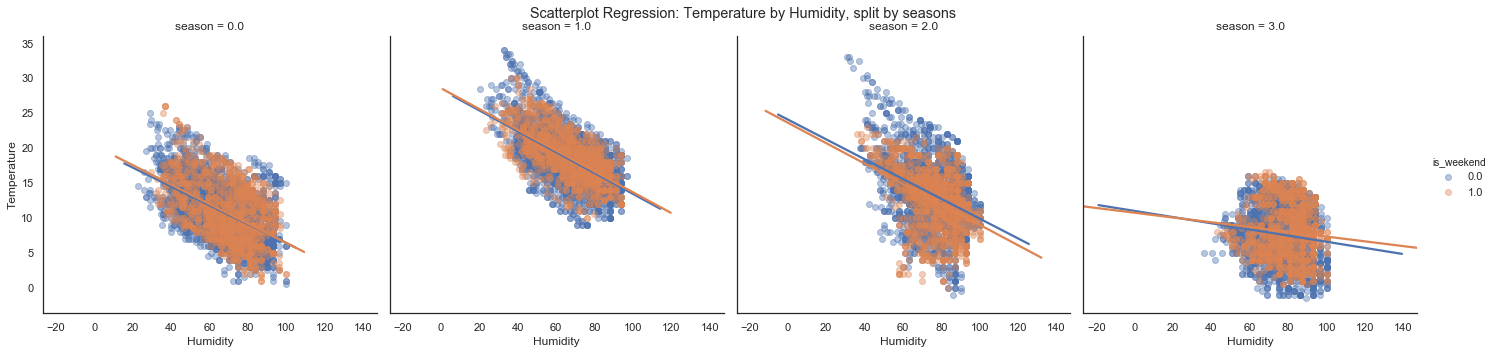

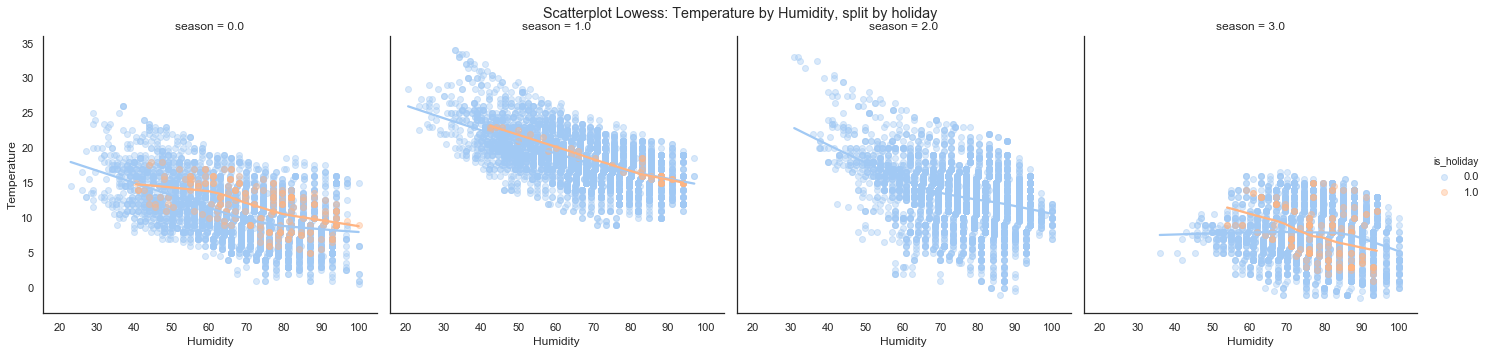

In [50]:
# Setting the overall aesthetic.
sns.set(style="white")

g = sns.lmplot(y='t1', # Variable 1.
               x='hum', # Variable 2.
               hue='is_weekend',
               data=df, # Data.
               col='season',
               fit_reg=True,
               ci=False,
               scatter_kws={'alpha':0.4})
g.set_ylabels("Temperature")
g.set_xlabels("Humidity")
plt.suptitle('Scatterplot Regression: Temperature by Humidity, split by seasons')
plt.subplots_adjust(top=0.9)
plt.show()

g = sns.lmplot(y='t1', # Variable 1.
               x='hum', # Variable 2.
               hue='is_holiday',
               data=df,  # Data.
               col='season',
               fit_reg=True, 
               ci=False,
               scatter_kws={'alpha':0.4}, 
               palette='pastel',
               lowess=True) # Using local weighing to fit a line.
g.set_ylabels("Temperature")
g.set_xlabels("Humidity")
plt.suptitle('Scatterplot Lowess: Temperature by Humidity, split by holiday')
plt.subplots_adjust(top=0.9)
plt.show()


### 4. Give the pros and cons of each plot you create. You can use variables from multiple datasets if you like.

1.Histograms plots<br>
- pros: easy to figure out how variations are displayed.
- cons: hard to see the details. And it's impossible to categorize.<br>

2.Boxplots
- pros: I can compare each groups and get rid of the data that I don't need.
- cons: hard to read a data at a glance.

3.Bar plots
- pros: It shows means so easy to figure out variable's infos.
- cons: Sometimes easy to make a mistake when you read the data because bar's size make you confused.

4.Point plots
- pros: Its appearance is small so use much less space.
- cons: Not that pretty looking.

5.Scatterp lots
- pros: They appear with or without a 'fit' line that attempts to summarize the relationship between the variables.
- cons: I don't see cons yet.